# 15 Dynamic Programming I

## Plan for the Lecture

1. Origins of DP - Richard Bellman's principle of optimality

2. DP optimisation strategies - Memoization vs tabulation / bottom-up vs top-down

3. Fibonacci exercise 

## Introduction to Dynamic Programming 

* Dynamic programming is a technique for solving multi-stage decision-making problems. 

* It involves  a sequence of decisions, the object of which is to optimise time, profit, cost, or resources by taking the  correct decision at each stage. 

* It was first developed by Richard Bellman and others in the 1950s as a management tool. 

* it has since been applied to production planning, machine scheduling, stock control,  allocation of resources, maintenance and replacement of equipment, investment planning and process design, amongst others. 


## Richard Bellman's Principle of Optimality

* Richard Bellman (1920 - 1984) was an American Mathematician who first proposed The Theory of Dynamic Programming in the 1950s (when programming was in its infancy - long before C, C++, C#, Java, Python).

* Bellman coined the term 'Curse of Dimensionality' (exponential increase in volume from adding more dimensions to a mathematical space - think of 1D, 2D, 3D). 

* Alongside Lester Ford Jr, he also published the 'Bellman-Ford Algorithm' for shortest path analysis of graphs - which unlike Edsgar Dijkstra's algorithm - can handle negative weights. Dijkstra's was only engineered to handle non-negative (positive) weights.

![Rich_E_Bellman](https://upload.wikimedia.org/wikipedia/en/7/7a/Richard_Ernest_Bellman.jpg)

![Theory_of_Dyn_Prog](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*u9pGurRcoGhvgFFs2XEUww.png)

## The principle of optimality: 

> “In any optimal sequence of decisions or actions, whatever the initial decision or action may be, the remaining decisions or actions must constitute an optimal sequence with regard to the state resulting from the first decision.”
> - Richard Bellman 

Dynamic programming that is used to solve optimisation problems by dividing the problems into smaller subproblems.


The principle relies on the idea that optimal solutions to complex problems can be constructed from optimal solutions to their subproblems. This recursive nature allows for breaking down large problems into manageable parts.



## DP in memoization 

* Dynamic programming that is used to solve optimisation problems by dividing the problems into smaller subproblems.

* The idea is to solve subproblems once and then store solutions to subproblems in memory. 

* This then allows the algorithm avoid redundant operations (to re-solve that subproblem) and optimise overall efficiency. 


## Top-down vs Bottom-up approaches to Dynamic Programming: 

* Top-down approach: <b>Memoization with recursion </b>
   * Stores solved problems in memory (hence the memo-) like caching. Can then retrieve previously solved problems. Often used in a recursive function.
   
* Bottom-down approach: <b>Tabulation with iteration </b>
  * Starts with smallest subproblem and solves in a predefined order – from smallest to largest. Stores solutions in a table (hence the tablu- prefix) and then uses them to solve larger subproblems. This map avoids the function call overhead and stack limitations of recursion. 


## What is memoization? 

* Memo pad - to write down solutions (think 'notepad')

* To remember

* Recycle previously stored problems 

<img src="https://www.choicewholesale.co.uk/cdn/shop/products/2imgmzuxgrz.jpg?v=1671883077" alt="memo_pad" width="150"> 

## Fibonnacci numbers

$F(n) = F(n-1) + F(n-2)$    for $n >=2 $ 

Below is a niave recursive solution: 

In [25]:
fib_naive_count = 0

def fib_naive(n):
    global fib_naive_count
    fib_naive_count += 1 
    
    if n == 0: 
        return 0;     #base case F(0) = 0
    if n == 1: 
        return 1;     #base case F(1) = 0
    return fib_naive(n - 1) + fib_naive(n - 2);     #recursive call

In [26]:
for i in range (0,15):
    print("f(" + str(i) + ") = " + str( fib_naive(i)))

f(0) = 0
f(1) = 1
f(2) = 1
f(3) = 2
f(4) = 3
f(5) = 5
f(6) = 8
f(7) = 13
f(8) = 21
f(9) = 34
f(10) = 55
f(11) = 89
f(12) = 144
f(13) = 233
f(14) = 377


In [27]:
for i in range (0,15):
    fib_naive_count = 0
    print("f(" + str(i) + ") = " + str( fib_naive(i))+ " - took " + str(fib_naive_count) + " operations to compute")

f(0) = 0 - took 1 operations to compute
f(1) = 1 - took 1 operations to compute
f(2) = 1 - took 3 operations to compute
f(3) = 2 - took 5 operations to compute
f(4) = 3 - took 9 operations to compute
f(5) = 5 - took 15 operations to compute
f(6) = 8 - took 25 operations to compute
f(7) = 13 - took 41 operations to compute
f(8) = 21 - took 67 operations to compute
f(9) = 34 - took 109 operations to compute
f(10) = 55 - took 177 operations to compute
f(11) = 89 - took 287 operations to compute
f(12) = 144 - took 465 operations to compute
f(13) = 233 - took 753 operations to compute
f(14) = 377 - took 1219 operations to compute


The time complexity of this original solution is exponential $O(2^n)$. For each Fibonacci number computed, two recursive calls are made (except for the base cases where $n <= 1$ ), leading to a binary tree of recursive calls with a height of $n$.

![Recursive_fib_tree](https://i.sstatic.net/8O0eb.jpg)

## Top-down: Recursion with a memo

In [28]:
fib_memo_count = 0

def fib_memo(n, memo=None):
    global fib_memo_count
    fib_memo_count += 1 
    
    if memo is None:
        memo = {}
    if n in memo:
        return memo[n]
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    memo[n] = fib_memo(n-1, memo) + fib_memo(n-2, memo)
    return memo[n]

In [30]:
test_values = range(0,15)

for i in test_values:
    fib_memo_count = 0
    print("f(" + str(i) + ") = " + str( fib_memo(i))+ " - took " + str(fib_memo_count) + " operations to compute")

f(0) = 0 - took 1 operations to compute
f(1) = 1 - took 1 operations to compute
f(2) = 1 - took 3 operations to compute
f(3) = 2 - took 5 operations to compute
f(4) = 3 - took 7 operations to compute
f(5) = 5 - took 9 operations to compute
f(6) = 8 - took 11 operations to compute
f(7) = 13 - took 13 operations to compute
f(8) = 21 - took 15 operations to compute
f(9) = 34 - took 17 operations to compute
f(10) = 55 - took 19 operations to compute
f(11) = 89 - took 21 operations to compute
f(12) = 144 - took 23 operations to compute
f(13) = 233 - took 25 operations to compute
f(14) = 377 - took 27 operations to compute


## Recursion optimised with `lru_cache` Decorator!

In [40]:
from functools import lru_cache

fib_lru_count = 0 

@lru_cache(maxsize=None)
def fib_lru(n):
    global fib_lru_count
    fib_lru_count += 1 
    #if n < 0:
    #    raise ValueError("Fibonacci number is not defined for negative integers.")
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fib_lru(n-1) + fib_lru(n-2)

In [35]:
n = 35
print(f"f({n}) = {fib_lru(n)}")

f(35) = 9227465


In [41]:

for i in test_values:
    fib_lru_count = 0
    print("f(" + str(i) + ") = " + str( fib_lru(i))+ " - took " + str(fib_lru_count) + " operations to compute")

f(0) = 0 - took 1 operations to compute
f(1) = 1 - took 1 operations to compute
f(2) = 1 - took 1 operations to compute
f(3) = 2 - took 1 operations to compute
f(4) = 3 - took 1 operations to compute
f(5) = 5 - took 1 operations to compute
f(6) = 8 - took 1 operations to compute
f(7) = 13 - took 1 operations to compute
f(8) = 21 - took 1 operations to compute
f(9) = 34 - took 1 operations to compute
f(10) = 55 - took 1 operations to compute
f(11) = 89 - took 1 operations to compute
f(12) = 144 - took 1 operations to compute
f(13) = 233 - took 1 operations to compute
f(14) = 377 - took 1 operations to compute


In [45]:
fib_iterative_count = 0 
def fib_iterative(n):
    #if n < 0:
    #    raise ValueError("Fibonacci number is not defined for negative integers.")
    global fib_iterative_count
    if n == 0:
        return 0
    if n == 1:
        return 1
    prev, curr = 0, 1
    for _ in range(2, n+1):
        fib_iterative_count += 1 
        prev, curr = curr, prev + curr
    return curr

In [39]:
n = 35
operation_count = 0 
print(f"f({n}) = {fib_iterative(n)}")

f(35) = 9227465


In [46]:

for i in test_values:
    fib_iterative_count = 0
    print("f(" + str(i) + ") = " + str( fib_iterative(i))+ " - took " + str(fib_iterative_count) + " operations to compute")

f(0) = 0 - took 0 operations to compute
f(1) = 1 - took 0 operations to compute
f(2) = 1 - took 1 operations to compute
f(3) = 2 - took 2 operations to compute
f(4) = 3 - took 3 operations to compute
f(5) = 5 - took 4 operations to compute
f(6) = 8 - took 5 operations to compute
f(7) = 13 - took 6 operations to compute
f(8) = 21 - took 7 operations to compute
f(9) = 34 - took 8 operations to compute
f(10) = 55 - took 9 operations to compute
f(11) = 89 - took 10 operations to compute
f(12) = 144 - took 11 operations to compute
f(13) = 233 - took 12 operations to compute
f(14) = 377 - took 13 operations to compute


## Time comparison

### Niave - no optimisation

In [23]:
import time

In [31]:
n = 35
start_time = time.time()
result = fib_naive(n)
end_time = time.time()
print(f"f({n}) = {result} computed in {end_time - start_time:.4f} seconds")

f(35) = 9227465 computed in 3.2962 seconds


### With our own memo explicitly defined

In [33]:
n = 35
start_time = time.time()
result = fib_memo(n)
end_time = time.time()
print(f"f({n}) = {result} computed in {end_time - start_time:.4f} seconds")

f(35) = 9227465 computed in 0.0001 seconds


### Recursion with `lru_cache` decorator

In [46]:
n = 35
start_time = time.time()
result = fib_lru(n)
end_time = time.time()
print(f"f({n}) = {result} computed in {end_time - start_time:.6f} seconds")

f(35) = 9227465 computed in 0.000031 seconds


### Fib with Iteration 

In [47]:
n = 35
start_time = time.time()
result = fib_iterative(n)
end_time = time.time()
print(f"f({n}) = {result} computed in {end_time - start_time:.6f} seconds")

f(35) = 9227465 computed in 0.000039 seconds


In [48]:
n = 35 

# Niave: 
start_time = time.time()
result = fib_naive(n)
end_time = time.time()
print(f"Niave f({n}) = {result} computed in {end_time - start_time:.4f} seconds")

# Memo: 
start_time = time.time()
result = fib_memo(n)
end_time = time.time()
print(f"Memo: f({n}) = {result} computed in {end_time - start_time:.4f} seconds")

# lru memo

start_time = time.time()
result = fib_lru(n)
end_time = time.time()
print(f"lru memo: f({n}) = {result} computed in {end_time - start_time:.6f} seconds")


# Iterative

start_time = time.time()
result = fib_iterative(n)
end_time = time.time()
print(f"Iterative f({n}) = {result} computed in {end_time - start_time:.6f} seconds")

Niave f(35) = 9227465 computed in 3.2972 seconds
Memo: f(35) = 9227465 computed in 0.0000 seconds
lru memo: f(35) = 9227465 computed in 0.000025 seconds
Iterative f(35) = 9227465 computed in 0.000020 seconds


## Applying DP to a directed network:

Some problems can be solved by drawing a directed network showing the possible decisions at each  stage. You start at $S$ and can make one of several decisions. Depending upon which one you take, you  can then take more decisions and so on, until you eventually reach $T$. 

The easiest problems are about minimising the cost or time. This is, of course, the same as finding the  shortest path from $S$ to $T$. 

If the shortest/longest path from $S$ to $T$ is $SABCT$, 
* then: the shortest/longest path from $S$ to $C$ is $SABC$, 
* the shortest/longest path from $S$ to $B$ is $SAB$,  
* the shortest/longest path from $S$ to $A$ is $SA$,  
* and the shortest/longest path from $A$ to $C$ is $ABC$. 

Pearson Edexcel AS and A level Further Mathematics Decision Mathematics 2 Textbook + e-book (A level Maths and Further Maths 2017) (p. 152). Pearson Education.

Use the following terminology for dynamic programming problems presented in network  form:  

* `Stage` - The route from the initial stage (`S` say) to the final state (`T` say) is made up of a sequence of moves. Each move is a stage / a time interval or an option being considered. 

* `State` - Vertex you are considering / the value of a resource from a previous stage.

* `Action` - This is the directed arc from one state to the next. In selecting an arc you are  considering what happens if you do that action. / The amount of the resource used in the current stage.

* `Destination` This is the vertex you arrive at having taken the action. / The value of the resource passed to the next stage.   

* `Value` This is the sum of the weights on the arcs used in a sequence of actions. / This is the sum of the weights on the arcs used in a sequence of actions. 

Pearson Edexcel AS and A level Further Mathematics Decision Mathematics 2 Textbook + e-book (A level Maths and Further Maths 2017) (p. 178). Pearson Education. Kindle Edition. 

## Fibonacci Numbers 

* Exercise 1: Fibonacci numbers 
* Let's warm up by writing a recursive fibonacci function. 
* Remember to add a base case so you can exit the recursive method calls.
* Now add memoization, which caches fibonacci numbers as they are calculated. 
*  
* Extension: Create an alternative fib function which is iterative and stores computations in a table (bottom-up approach)
* Question: What are performance differences between iterative/tabulation approach and the recursive/memoization approach?


## Longest Common Subsequence



* Exercise 2: Longest Common Subsequence (LCS)
*
* Given two sequences, find the length of the longest subsequence present in both of them. 
*
* Step 1. Define a 2D dynamic programming table
* Step 2. Initialise the base cases.
* Step 3. Fill the table using the recurrence relation:
*               If the characters of both sequences match:
*                   dp[i][j] = dp[i-1][j-1] + 1
*               else 
*                   dp[i][j] = max(dp[i-1][j], dp[i][j-1])
* Step 4. The length of the LCS is in dp[m][n] where m and n are the lengths of the two sequences.
*

## Knapsack / Rucksack problem 



Exercise 3: Rucksack (knapsack) problem
* Given a maximum weight that a rucksack (knapsack) can hold, write a function which will
* determine the most valuable subset of items that can be included in the rucksack without exceeding its weight limit.
* 
* Inputs will be: 
*   W (the max weight the rucksack can hold)
*   n (number of items)
*   The weights and values of the items
* 
* To go about this problem, start by defining a table where rows represent items
* and columns represent possible weight capacities. 
*/


## Floyd-Warshall Algorithm - all pairs shortest paths



Floyd Warshall algorithm - all-pairs shortest paths
* This is a dynamic programming approach to build up the solution for the shortest paths step by step. 
* It considers each pair of vertices and iteratively improves the path between them by considering each possible intermediate vertex.
*
* Step 1. Initialization: 
*   Create a 2D array dist where dist[i][j] represents the shortest distance from vertex i to vertex j. 
*   Initialize dist[i][j] to the weight of the edge from i to j if it exists, otherwise to infinity. 
*   Set dist[i][i] = 0 for all vertices i.
*
* Step 2. Dynamic Programming:  
*   Update the distance array dist by considering each vertex as an intermediate vertex and 
*   updating the shortest paths accordingly. For each pair of vertices (i, j), update dist[i][j].
*
* Step 3. Result: 
*   After considering all vertices as intermediate vertices, the dist array contains the 
*   shortest paths between all pairs of vertices.
*
*
*/


## Bellman-Ford Algorithm 

Belmman-Ford is good for reporting negative cycles - edges that sum to negative values.

![Bellman_ford_algo](https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Bellman–Ford_algorithm_example.gif/440px-Bellman–Ford_algorithm_example.gif)

## minimax and maximin

* minimax route is one in which the maximum value of the individual arcs (edges) used is as small  as possible.

* A maximin route is one in which the minimum value of the individual arcs (edges) used is as large  as possible. 


## Applying Dynamic Programming to network flows

* Maximin 

* Minimax

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges along with their capacities
G.add_edge('A', 'B', capacity=10)
G.add_edge('A', 'C', capacity=15)
G.add_edge('B', 'D', capacity=10)
G.add_edge('C', 'D', capacity=10)
G.add_edge('B', 'E', capacity=5)
G.add_edge('D', 'E', capacity=10)

In [2]:
source = 'A'
sink = 'E'

In [3]:
def maximin_path(G, source, sink):
    """
    Finds the path from source to sink with the maximum minimum capacity.
    """
    import heapq

    # Initialize capacities to negative infinity
    max_min_capacity = {node: float('-inf') for node in G.nodes}
    max_min_capacity[source] = float('inf')

    # Priority queue: (current max min capacity, node, path)
    heap = [(-max_min_capacity[source], source, [])]

    visited = set()

    while heap:
        # Get the node with the current highest min capacity
        current_capacity, u, path = heapq.heappop(heap)
        current_capacity = -current_capacity

        if u in visited:
            continue
        visited.add(u)
        path = path + [u]

        if u == sink:
            return current_capacity, path

        for v in G.neighbors(u):
            if v not in visited:
                edge_capacity = G[u][v]['capacity']
                # The minimal capacity along the path is the min of current path and this edge
                min_capacity = min(current_capacity, edge_capacity)
                if min_capacity > max_min_capacity[v]:
                    max_min_capacity[v] = min_capacity
                    heapq.heappush(heap, (-max_min_capacity[v], v, path))
    
    return None, None  # No path found

In [5]:
def visualize_path(G, path, title):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8,6))
    
    # Draw all nodes and edges
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    
    # Highlight the path
    if path:
        # Create a list of edge tuples in the path
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, arrows=True)
        edge_labels = {(u, v): G[u][v]['capacity'] for u, v in path_edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    plt.title(title)
    plt.axis('off')
    plt.show()

=== Initial Maximin Path ===
Path: A -> C -> D -> E
Minimum capacity along this path: 10 vehicles/hour



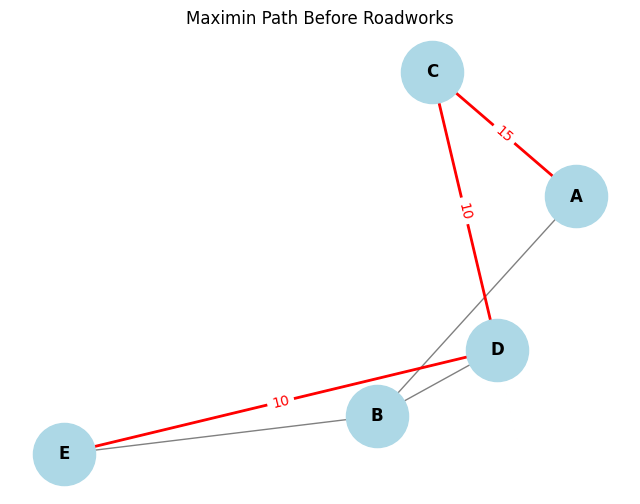

In [6]:
# Find the maximin path
capacity, path = maximin_path(G, source, sink)

print("=== Initial Maximin Path ===")
print(f"Path: {' -> '.join(path)}")
print(f"Minimum capacity along this path: {capacity} vehicles/hour\n")

# Visualize the path
visualize_path(G, path, "Maximin Path Before Roadworks")

## Exercise: 

Without using any functions provided by libraries (e.g. `reverse()`), implement a function that will reverse the contents of a string. 

In [ ]:
# Write your solution here or in a dedicated py file.


## Exercise: 

Write a function that checks if a given string is a palindrome (same word forwards as backwards). Examples of palindromes include 'eve', 'madam', 'racecar' etc.


In [ ]:
# Write your solution here or in a dedicated py file.


## Exercise:
Write a function to determine if a string has all unique characters. Return `True` or `False` respectively.

In [ ]:
# Write your solution here or in a dedicated py file.


## Exercise:

Write a function that will replace all spaces in a string with "%20". This is the hexedecimal encoding that is used to replace spaces in URLs (which cannot contain spaces). 

In [ ]:
# Write your solution here or in a dedicated py file.


## Exercise: 

Write a function that checks whether two given strings are anagrams of each other.
Definition of an anagram is being able to make another word from the same characters: 'mood' and 'doom', 'listen' and 'silent' 

In [ ]:
# Write your solution here or in a dedicated py file.


## Exercise: 

Write a function that will replace all spaces in a string with "%20". This is the hexedecimal encoding that is used to replace spaces in URLs (which cannot contain spaces). 

In [ ]:
# Write your solution here or in a dedicated py file.


## Additional Exercises - Maths

## Exercise 

Write to function which will evaluate whether a number passed in is prime (divisible by itself and 1) or not. Return `True` if the number is prime, and return `False` if the number is not. Test this with a range of positive integers. 

In [ ]:
# Write your solution here or in a dedicated py file.


## Exercise 

Generate three side lengths of a triangle (positive integers). Write a function that will determine whether these form a right-angled triangle using Pythagoras’ theorem.

As a reminder, Pythagoras' theorem is: $a^2 + b^2 = c^2$


In [ ]:
# Write your solution here or in a dedicated py file.


## Exercise 
Calculate the distance between two points $(x_1, y_1)$ and $(x_2, y_2)$ in a 2D plane using Pythagoras’ theorem.

Hint: To calculate distance (denoted as $d$) applying the following formula:   
$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$ 

Extension: import matplotlib and draw these points and the line between them on a 2D plot.

In [ ]:
# Write your solution here or in a dedicated py file.


## Exercise 

Now, write a function which will output all prime numbers up to $N$ (which you pass in).
If you get stuck, research the 'Sieve of Eratosthenes` and implement this algorithm to output the prime numbers in sequence up until the upper bound $N$ as specified.

In [ ]:
# Write your solution here or in a dedicated py file.


## Additional OOP Exercises!

## Exercise 1: 

Design the data structures for a generic deck of cards. Explain how you would subclass the data structures to implement blackjack (21). 

In [ ]:
# Write your solution here or in a dedicated py file.


## Exercise 2: 

Imagine you have a call centre with three levels of employees: respondent, manager and director. An incoming telephone call must be first allocated to a respondent who is free. If a respondent can't handle the call, they must escalate the call to the manager. If the manager is not free or not able to handle it, then the call should be escalated to a director. Design classes and data structures for this problem. Implement a function `dispatch_call()` which assigns the call to the first available employee. 

In [ ]:
# Write your solution here or in a dedicated py file.


## Exercise 3: 

Implement a jigsaw puzzle. Design the data structures and explain an algorithm to solve the puzzle. You can assume that you have a `fits_with()` function, which when passed two puzzle pieces, returns `True` if the pieces fit together. 

In [ ]:
# Write your solution here or in a dedicated py file.
